<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
FALL 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Neural Networks <br>
<font color=696880 size=4>
Arash Ziyaei Razban - Mahan Bayhaghi

____________

# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: Amirhosein Rezaei

Student ID: 401105989

# Recurrent Neural Network (RNN)

Nowadays machine learning algorithms and models are used to solve too many types of problems. One of the most important problems is sequence modeling. Sequence modeling is the ability of an algorithm to model, interpret, make predictions about, or generate sequence data like audio, text, etc.

One of the most used algorithms to solve sequence modeling problems is the Recurrent Neural Network which is a specialized form of the classical Artificial Neural Network (Multi-Layer Perceptron). Below is a picture of this network architecture:

<img src="RNN.jpg" width="400" height="200">

In sequences there is a common feature, that each value has some dependency on its previous members. A simple example is arithmetic sequence: $a_i = i * d + a_0, 0 \leq i$, where $a_n$ is dependent on $a_{n-1}$. So based on this nature of the sequences, there is a loop inside the RNN cell. This helps the RNN cell to remember some information about the previous activation values.

In general, RNN is used to model sequences because of the following advantages:
+ handles variable-length dependencies.
+ Tracks dependencies.
+ Maintains information about the order.
+ Shares parameters across the sequence.


# What you are going to do in this notebook

+ `Step1.` You have to design a simple neural network that has only 4 neurons, inspired by the RNNs architecture, and use it to predict the next number of an arithmetic sequence.

+ `Step2.` You have to increase the number of the neurons to 8. Then you have create a complex dataset of arithmetic sequences, that in each with a number of `d` called $1 \leq n$.

+ `Step3.` In the previous sections, you will find out why just using the basic architecture of RNNs does not work for complex data. So, for this step, you have to implement a Gated Recurrent Unit (GRU) from scrach to train and test it over the MNIST dataset and compare it with PyTorch GRU.

# START TO LEARN ABOUT RNNs (30 points)
Step 1. First, we start with simple data, like arithmetic sequence: $a_i = i * d + a_0, 0 \leq i$.

You have to design a simple neural network (only 4 neurons) inspired from the RNNs to predict the next number in the sequence.

`Note`: First, try to solve this problem theoretically (find the final values for your network's weights) and then implement it.

`your answer`


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [57]:
# TODO
def CustomDataset(max_length = 20, size = 10000):
    """
        Generate your dataset with following details:
        -100 <= a_i <= 100
        -20 <= d <= 20
        len(sequence) <= max_length

        Parameters:
            - max_length = 20
            - size = 10000

        Returns:
            - dataset = [(length, sequence, next_number in the sequence) for each sequence]
    """
    dataset = []
    for _ in range(size):
        a0 = np.random.randint(-100, 101)
        d = np.random.randint(-20, 21)
        length = np.random.randint(1, max_length + 1)
        sequence = [a0 + i * d for i in range(length)]
        next_number = a0 + length * d
        dataset.append((length, sequence, next_number))
    return dataset

# Now create the model:
Based on the this task design your model.
+ Note that, your model should inspire from the behavior of RNNs.
+ Solve this problem theoretically. Then you will find out you only need 4 neurons.

In [58]:
# TODO
class Model(nn.Module):
    """
        Design your model.
    """
    def __init__(self, input_size=1, hidden_size=4):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.hidden_layer = nn.Linear(input_size + hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
    def forward(self, x, h):
        combined = torch.cat((x, h), dim=-1)
        h = torch.tanh(self.hidden_layer(combined))
        output = self.output_layer(h)
        return output, h

# Training Loop
Now you have to train your model.

Note, your architecture must be based on RNNs. This means that you have to set a hidden state called `h` and use it to create a loop for your model like RNNs.

In [59]:
# create your dataset, using the CustomeDataset function
CustomDataset = CustomDataset()

# Initialize model, loss function (use MSE Loss function), and optimizer (use adam optimizer)
model = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TODO
# Training loop
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    hidden_state = torch.zeros(1, 4)

    for length, sequence, next_number in CustomDataset:
        optimizer.zero_grad()
        h = hidden_state.clone()
        x = torch.tensor(sequence, dtype=torch.float32).unsqueeze(-1)
        target = torch.tensor(next_number, dtype=torch.float32).unsqueeze(-1)
        for i in range(length):
            output, h = model(x[i].unsqueeze(0), h)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(CustomDataset):.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Loss: 20443.8182
Epoch 2/10, Loss: 15229.0748
Epoch 3/10, Loss: 11534.8095
Epoch 4/10, Loss: 8873.8621
Epoch 5/10, Loss: 6925.3978
Epoch 6/10, Loss: 5486.3633
Epoch 7/10, Loss: 4391.5682
Epoch 8/10, Loss: 3566.9572
Epoch 9/10, Loss: 2891.1127
Epoch 10/10, Loss: 2337.3065


# Weights Evaluation
Print the weights of the model.

You can see, model's weight are exactly same as what you have found in theoretical way.

In [61]:
# print model's weights
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')

hidden_layer.weight: tensor([[ 0.0234, -0.7329],
        [ 1.6023,  2.3243]])
hidden_layer.bias: tensor([[-0.0658,  2.1827],
        [-0.5575, -1.1078]])


# Write your opinion
How this model use hidden state? Why hidden state is helpful?

`your answer` The hidden state carries information from the previous timestep to the next, enabling the RNN to maintain a form of memory about prior inputs.
It helps capture sequential dependencies and patterns, crucial for tasks involving time series or context in sequential data.

# Analysis of long-term dependencies (40 points)
Step 2. Now, we are going to do some analysis. In the previous, both the dataset and model were simple. Now, we want to make it a little complex.

+ Assume the lengths for all sequences are equal.
+ Consider each sequence has `n` number of `d`:
    - e.g, $a_0, a_0 + d_0, a_1 + d_1, a_2 + d_2, ...., a_{n-1} + d_{n-1}, a_{n} + d_0, a_{n+1} + d_1, ...$
+ Change your model: just increase the number of neurons to 8. Also, because your input's dimension has changed, you have to increase the hidden state `h` dimension.
+ Create a loop over all possible $2 \leq n \leq 10$ and generate a dataset for each one. Then train a new model for each dataset.
+ At the end, show a `TotalLoss - numberOfd` plot.

In [6]:
# new model
# TODO
class Model(nn.Module):
    """
        Design your model.
    """
    def __init__(self, input_size=1, hidden_size=8):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.hidden_layer = nn.Linear(input_size + hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
    def forward(self, x, h):
        combined = torch.cat((x, h), dim=-1)
        h = torch.tanh(self.hidden_layer(combined))
        output = self.output_layer(h)
        return output, h

In [7]:
# TODO
def CustomDataset(n, length = 20, size = 10000):
    """
        Generate your dataset with following details:
        -100 <= a_i <= 100
        -20 <= d <= 20

        Parameters:
            - n: number of d in sequences
            - length = 20 (length of all sequences)
            - size = 10000

        Returns:
            - dataset = [(length, sequence, next_number in the sequence) for each sequence]
    """
    dataset = []
    for _ in range(size):
        a0 = np.random.randint(-100, 101)
        d = np.random.randint(-20, 21, size=n)
        sequence = []
        for i in range(length):
            sequence.append(a0 + i * d[i % n])
        next_number = a0 + length * d[length % n]
        dataset.append((length, sequence, next_number))
    return dataset

In [51]:
# TODO
losses = []
epochs = 10

for n in range(2, 10):
    total_loss = 0
    # create your dataset, using the CustomeDataset function
    dataset = CustomDataset(n=n)

    # Initialize model, loss function (user MSE Loss function), and optimizer (use adam optimizer)
    model = Model()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # use scheduler for learning rate - optional


    loss = 0
    # Training loop
    for epoch in range(epochs):
        for length, sequence, next_number in dataset:
            optimizer.zero_grad()
            h = hidden_state.clone()
            x = torch.tensor(sequence, dtype=torch.float32).unsqueeze(-1)
            target = torch.tensor(next_number, dtype=torch.float32).unsqueeze(-1)
            for i in range(length):
                output, h = model(x[i].unsqueeze(0), h)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
    loss = total_loss / len(dataset)
    losses.append(loss)
    print(loss)

559.7249644
7.5436875
3.5451914
0.9745645
2.8580139
2.6273525
2.7851267
1.6952385
1.5920908
0.9745645
1.6322942
1068.4197479
18.1078896
9.3757269
7.3806287
6.5195269
5.4336306
4.5079442
3.3853299
2.2092133
1.7970215
2.7975215
465.1087245
17.0582555
17.8487576
13.9393064
17.1118052
16.8261021
13.0135922
15.0949521
11.9951091
14.6645800
14.6647800
376.3474341
49.1959422
30.9856868
29.9346055
27.2747626
26.6839187
27.4972231
25.1809493
20.4511685
17.7567109
17.7567109
435.1759229
45.7437649
36.6989128
24.0045344
25.4050851
23.6352075
23.2584240
24.0762916
20.4798948
23.9213145
23.9213145
148.9775852
78.6159899
50.1099188
45.7470931
37.5777086
33.9600484
33.6582551
31.6099107
30.1845005
26.7021874
30.2021874
406.6143041
133.2175176
113.1917562
70.1754715
69.7373545
69.6893695
69.6604956
69.6322951
69.6044558
69.5773908
73.0773908
342.0732899
126.8943543
124.2953881
123.9537673
123.7805802
124.5759314
99.3065298
66.5927322
62.1928257
63.0903309
63.0903309


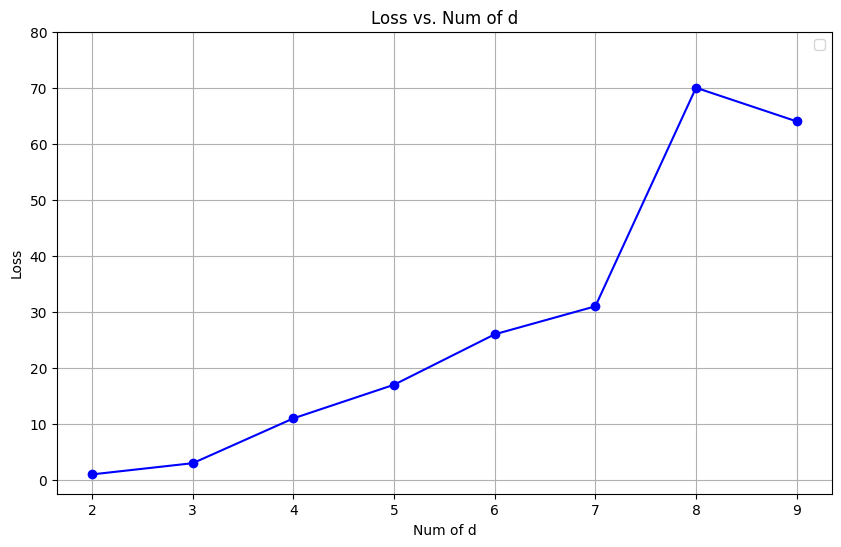

In [55]:
# plot your amount of loss and number of d in datasets
plt.plot(range(2, 10), losses, marker='o', linestyle='-', color='blue')
plt.xlabel('Num of d')
plt.ylabel('Loss')
plt.title('Loss vs. Num of d')
plt.show()

# Write your opinion

+ You can see, as the number of d in the sequences increases the amount of the total loss increases too. Why?
    - Because of gradient vanishing, causing the RNN to struggle in learning dependencies from earlier timesteps. This leads to higher errors and increased loss.

+ Can you mathematically explain your opinion? (help: There are some gradient issues!)
    - `your answer` Gradients are computed using the chain rule as t increases, repeated multiplications by small gradients shrink the overall gradient, leading to the vanishing gradient issue. Large gradients can lead to exploding gradients.

+ Can you explain the problem of Long-term dependencies in RNNs?
    - `your answer` RNNs struggle with long-term dependencies because the gradient signal diminishes or explodes. This means they cannot effectively propagate information from distant timesteps, making them unsuitable for learning relationships across long sequences.

# Gated Recurrent Units (GRUs) (30 points)

Step3. In the previous section, you saw, simple recurrent models cannot remember information from the past. This is a big problem because in real-world applications sequences have a lot of dependencies on their past time steps and we have to find a way to remember the information from the past. To address this problem, researchers have designed other architecture that can selectively remember or forget information over time. Like: `Long-Short Term Memory (LSTM)` and `Gated Recurrent Unit (GRU)`. The key building block behind these architectures is `gate`.

#### GATE:
These networks, use gates to track information throughout many time steps:
+ Add information, when the information is needed.
+ Remover information, When information is not important

<img src="GATE.jpg" width="400" height="200">

#### Long-Short Term Memory:
LSTM is an improved version of RNNs. In a classical recurrent model, there is a single hidden state `h` which is used to help the model to remember some information over time. But this is not enough to learn long-term dependencies. Using gates, LSTM is capable of addressing the problem of long-term dependencies.

LSTM cell:

<img src="LSTM.jpg" width="400" height="200">

GATES:
+ <font color=green size=3> Forget gate:</font> To forget irrelevant information.
+ <font color=red size=3> Store gate:</font> Decide what part of new is relevant.
+ <font color=orange size=3> Update:</font> update cell state values.
+ <font color=blue size=3> Output gate:</font> Controls what information is sent to the next time step.

This architecture addresses the gradient issues you have described in the previous section. (How?)

`write your answer`

#### Gated Recurrent Unit (GRU):
Like LSTM, GRU is designed to model sequential data by allowing information to be selectively remembered or forgotten over time.

GRU cell:

<img src="GRU.jpg" width="400" height="200">

GATES and other parts:
+ <font color=green size=3> Reset gate:</font> How much of previous hidden state to forget.
    - $r_t = \sigma(W_r \cdot [h_{t-1}, x_t])$
+ <font color=orange size=3> Update gate:</font> How much of the candidate activation vector to incorporate into the new hidden state.
    - $z_t = \sigma(W_z \cdot [h_{t-1}, x_t])$
    
+ <font color=red size=3> Candidate Activation vector:</font> Computed using the current input x and modified version of the previous hidden state that is `reset` by the reset gate.
    - $\tilde{h}_t = \tanh(W_h \cdot [r_t \odot h_{t-1}, x_t])$

+ <font color=blue size=3> Hidden state</font>
    - $h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$

Note: the $W_r$, $W_z$, $W_h$ are the weights associated with the GRU cell.

# GRU Implementation
Now, implement a Gated Recurrent Unit from scratch.

In [11]:
class GRU_cell(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_calsses):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_classes = num_calsses

        self.reset_gate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        self.update_gate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        self.candidate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)

        self.output = nn.Linear(self.hidden_dim, self.num_classes)

        # TODO
        # define activation functions
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x, h, end=False):
        combined = torch.cat([x, h], dim=1)
        r_t = self.sigmoid(self.reset_gate(combined))
        z_t = self.sigmoid(self.update_gate(combined))
        r_combined = torch.cat([r_t * h, x], dim=1)
        h_tilde = self.tanh(self.candidate(r_combined))
        h_t = (1 - z_t) * h + z_t * h_tilde
        out = self.output(h_t)
        return out, h_t

# MNIST
MNIST database is a collection of handwritten digits. You are going to use this database to train and test your GRU cell.

First, to download this database run the cell below.

In [12]:
database = MNIST(root = 'data/', download = True)
# TODO
# get train and test data - use transforms.ToTensor() to convert images to tensor
train_data = database.data[:60000]
train_labels = database.targets[:60000]
test_data = database.data[60000:]
test_labels = database.targets[60000:]

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.59MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Show the image and label of one instance from the train data.

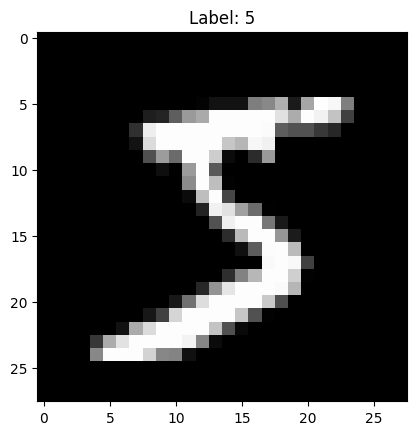

In [13]:
# TODO
plt.imshow(train_data[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

In [14]:
# TODO
# show one image tensor
print(train_data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### Write a generate custom dataset function
+ For each data in the database convert, use one-hot encoding from pytorch to encode your label to a vector. This is necessary for computing the amount of loss.
+ It is common to use batches of data to train our model simultaneously on a batch. The length of a batch at most is `BATCH_SIZE`.
    - Note: you can also train your model on each data (one by one) but the training part will take too much time.
+ Return batches of data.

In [15]:
HIDDEN_DIM = 15
INPUT_DIM = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 30

In [18]:
def CustomDataset(data, labels, batch_size = BATCH_SIZE):
    """
        Generate batches of data. Use one-hot encoding to encode your labels according to number of classes.

        Parameters:
            - data: MNIST database
            - batch_size = BATCH_SIZE

        Returns:
            - batches = A list of [(image_tensor, encoded label)]. Each batch's length is at most BATCH_SIZE
    """
    batches = []

    for i in range(0, len(data), batch_size):
        batch_data = data[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        encoded_labels = nn.functional.one_hot(batch_labels, num_classes=NUM_CLASSES).float()
        batch = [(image.unsqueeze(0).float(), label.unsqueeze(0)) for image, label in zip(batch_data, encoded_labels)]
        batches.append(batch)
    return batches

### Training loop
write your training loop.
+ For loss function: use `CrossEntropyLoss` function
+ Use adam optimizer
+ To optimize your training process, you can use `optim.lr_schduler`. (Why this will improve the training process?)
    - `your answer` It helps in optimizing the learning process by adjusting the learning rate based on the training progress, leading to better performance, faster convergence, and more stable training.
+ Note: Also, in each time step give one row of image tensor to the model because your model is sequential (you also can use each column).

In [47]:
# TODO
# create batches
batches = CustomDataset(train_data, train_labels)

# Initialize model, loss function, and optimizer
model = GRU_cell(INPUT_DIM, HIDDEN_DIM, NUM_CLASSES)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# use scheduler to set learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# training loop
# TODO
# Training loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in batches:
        for x, y in batch:
            h = torch.zeros(1, HIDDEN_DIM)
            optimizer.zero_grad()
            for t in range(x.size(1)):
                out, h = model(x[:, t, :].view(1, -1), h)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
    scheduler.step()
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(batches)}')

test_batches = CustomDataset(test_data, test_labels)

Epoch 1, Loss: 1.7522431
Epoch 2, Loss: 1.1025127
Epoch 3, Loss: 0.8721688
Epoch 4, Loss: 0.7612479
Epoch 5, Loss: 0.5746252
Epoch 6, Loss: 0.4978615
Epoch 7, Loss: 0.4312358
Epoch 8, Loss: 0.3699973
Epoch 9, Loss: 0.3374612
Epoch 10, Loss: 0.3065037
Epoch 11, Loss: 0.2841758
Epoch 12, Loss: 0.2617439
Epoch 13, Loss: 0.2472235
Epoch 14, Loss: 0.2329974
Epoch 15, Loss: 0.2185774
Epoch 16, Loss: 0.1923985
Epoch 17, Loss: 0.1919984
Epoch 18, Loss: 0.1864223
Epoch 19, Loss: 0.1785334
Epoch 20, Loss: 0.1713858
Epoch 21, Loss: 0.1639882
Epoch 22, Loss: 0.1581943
Epoch 23, Loss: 0.1523968
Epoch 24, Loss: 0.1468429
Epoch 25, Loss: 0.1423885
Epoch 26, Loss: 0.1376523
Epoch 27, Loss: 0.1337582
Epoch 28, Loss: 0.1218513
Epoch 29, Loss: 0.1191472
Epoch 30, Loss: 0.1189538


### Test your model on Test data
Use the test data to evaluate your model.
+ Print the accuracy of your model (should be greater than $94\%$).
+ Show some predictions with actual value from the test data.

In [31]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_batches:
        for x, y in batch:
            h = torch.zeros(1, HIDDEN_DIM)
            for t in range(x.size(1)):
                out, h = model(x[:, t, :].view(1, -1), h)
            _, predicted = torch.max(out, 1)
            total += y.size(0)
            correct += (predicted == torch.argmax(y, dim=1)).sum().item()
            accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.51%


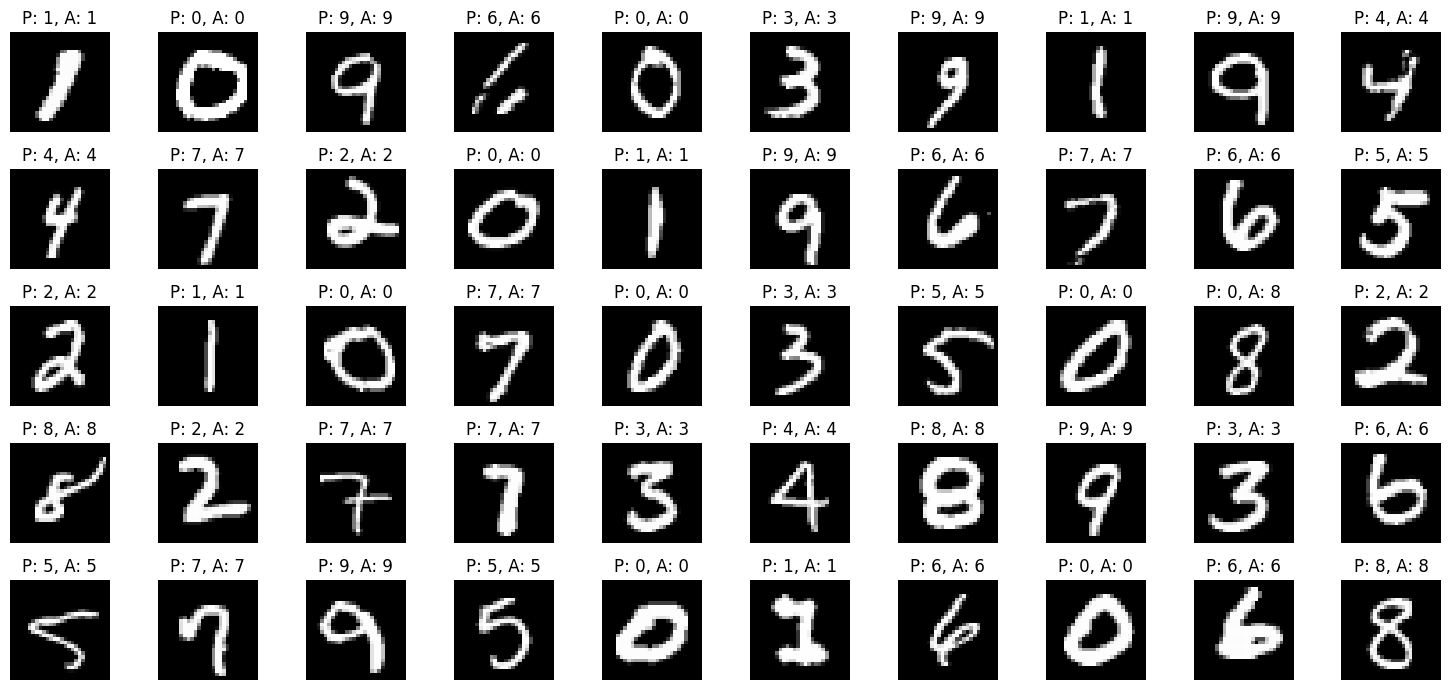

In [45]:
# show images of 50 predictions with actual values
test_samples = np.random.choice(len(test_data), 50, replace=False)
fig, axes = plt.subplots(5, 10, figsize=(15, 7))
with torch.no_grad():
    for idx, sample_idx in enumerate(test_samples):
        x = test_data[sample_idx].unsqueeze(0).float()
        y = test_labels[sample_idx]
        h = torch.zeros(1, HIDDEN_DIM)
        for t in range(x.size(1)):
            out, h = model(x[:, t, :].view(1, -1), h)
        _, predicted = torch.max(out, 1)
        ax = axes[idx // 10, idx % 10]
        ax.imshow(x.squeeze(), cmap='gray')
        ax.set_title(f'P: {predicted.item()}, A: {y.item()}')
        ax.axis('off')
plt.tight_layout()
plt.show()